In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#SABER LA VERSION DE TF
tf.__version__



'2.15.0'

**OBTENER LA DATA DE KERAS**::

In [5]:
#CROSS VALIDATION -DIVIDIR LA DATA ENTRENAMIENTO Y TEST, SI TENGO MUCHA DATA TAMBIÉN VALIDACIÓN
#VALIDACIÓN-DATA CON LA QUE NUNCA VA A ENTRENAR
(train_data, train_targets),(test_data, test_targets)=tf.keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [41]:
print(f"Training data shape{train_data.shape}" )
print(f"Training data targets shape{train_targets.shape}")
print(f"Test data shape{test_data.shape}")
print(f"Test data targets shape{test_targets.shape}")

Training data shape(404, 13)
Training data targets shape(404,)
Test data shape(102, 13)
Test data targets shape(102,)


**NORMALIZAR DATA -> LLEVAR ESCALAS ENTRE MIN  Y MAX  EJM 1 Y 0 O MEDIA Y DESVIACIÓN. OTRA OPCION--> ENCONTRAR VALOR MEDIO, LE RESTO DATA A SU VALOR MEDIO Y DIVIDO ENTRE DESVIACIÓN**

In [42]:
# USAR NUMPY - Le debo decir que sea un solo valor no por cada columna (media global de cada uno elems)

#Encontrar Media y desviación Estandar para ambos dataset
train_mean= np.mean(train_data, axis=0)
train_std= np.std(train_data, axis=0)

test_mean=np.mean(test_data, axis=0)
test_std=np.std(test_data, axis=0)

#Ver la forma
print(f"Training medias shape {train_mean.shape}")
print(f"Training std shape {train_std.shape}")

Training medias shape (13,)
Training std shape (13,)


**Ahora si normalizo Los dos Datasets Entrenamiento y Test**

In [43]:
train_data= (train_data - train_mean)/train_std
test_data= (test_data - test_mean)/test_std

**Los valores quedan entre  0 y 1**

In [44]:
test_data[15]

array([-0.5148061 ,  0.51698332, -0.76672497, -0.32969024, -1.03363266,
       -0.36793015, -1.10579648,  1.70736658, -0.34143513, -0.49569798,
        0.35971885,  0.33037273, -0.47211869])

**CONTRUIR MODELO PARA PODER PASARLE DATASETS Y QUE ENTRENE CON ESA DATA**

In [45]:
#KERAS -> API DE ALTO NIVEL
#en este ejemplo: Secuencial multi lyer perceptron ( capa entrada, capas ocultas y capa salida) Arq. Embudo ppio de Arq Encoded Decoded

def build_model():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(train_data.shape[1],))) #capa entrada
#--------------------------------------------------------------------IMPLEMENTAR TECNICA DE DROPOUT ENTRE CADA CAPA PORQUE MI DATA ES PEQUEÑA Y SE SOBREAJUSTA A DATA  MI MODELO
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(64, activation="relu"))
  model.add(tf.keras.layers.Dense(32, activation="relu"))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(1, activation="linear"))
#--------------------------------------------------------------------Ahora que compile y genere grafo -
#-------------------------------------------------------------------- DECIRLE FUNCION DE PERDIDA O COSTE, OPTIMIZADOR Y METRICAS DE EVALUACION DE MODELO (EN ESTE CASO ES REGRESIÓN)
  model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
  #MOSTRAR ESTRUCTURAS CON ENTRADA Y SALIDA EN CADA EPOCH
  model.summary()
  return model


In [46]:
mymodel=build_model()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1792      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 1216

**ENTRENAR MODELO CON DATASET ENTRADA, SALIDA Y VALIDACION**

In [47]:
history= mymodel.fit(train_data, train_targets, validation_data= (test_data, test_targets), epochs=100, batch_size=8)

Epoch 1/100
51/51 [==============================] - 1s 8ms/step - loss: 470.8052 - mse: 470.8052 - mae: 19.4707 - val_loss: 256.6153 - val_mse: 256.6153 - val_mae: 13.9669
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 101.9972 - mse: 101.9972 - mae: 7.6200 - val_loss: 44.5852 - val_mse: 44.5852 - val_mae: 5.1342
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 53.3072 - mse: 53.3072 - mae: 5.5241 - val_loss: 27.3401 - val_mse: 27.3401 - val_mae: 4.0223
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 49.4093 - mse: 49.4093 - mae: 4.9322 - val_loss: 26.2890 - val_mse: 26.2890 - val_mae: 3.7756
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 47.7901 - mse: 47.7901 - mae: 5.1777 - val_loss: 25.5232 - val_mse: 25.5232 - val_mae: 3.6538
Epoch 6/100
51/51 [==============================] - 0s 5ms/step - loss: 34.3594 - mse: 34.3594 - mae: 4.5008 - val_loss: 24.4378 - val_mse: 24.4378 - val_ma

**PLOTEAR EL HISTORICO PARA VER SI HAY SOBREAJUSTE**

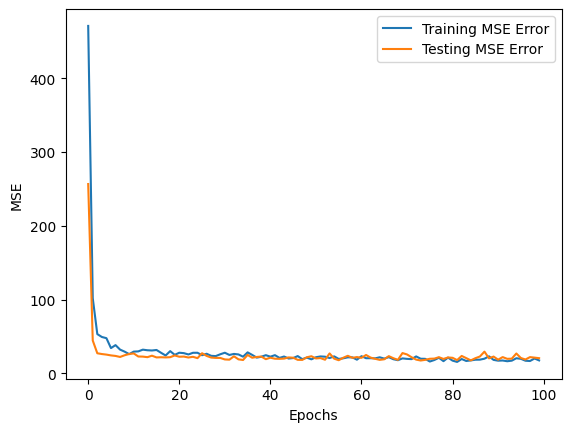

In [48]:
def plot_history(hist):
  plt.figure()
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.plot(hist.epoch, hist.history["mse"], label="Training MSE Error")
  plt.plot(hist.epoch, hist.history["val_mse"], label="Testing MSE Error")
  plt.legend()
  plt.show()

plot_history(history)
